In [25]:
import gdal

In [26]:
fl = '/RHESSys/Como/auxdata/gridmet_dem_60m.tiff'

In [27]:
ds = gdal.Open(fl)
rast = np.array(ds.GetRasterBand(1).ReadAsArray(),dtype=float)

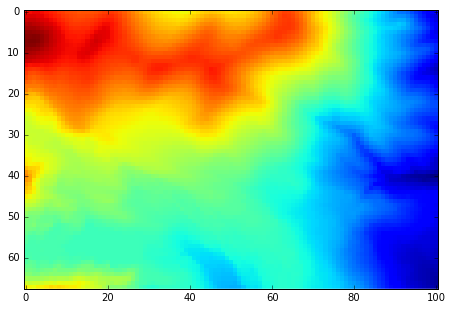

In [28]:
plt.figure(figsize=(15,5))
plt.imshow(rast,interpolation='none')

In [29]:
m,n = rast.shape

In [30]:
rast.shape = m*n

In [31]:
# change the raster values to incrementing values
for i in range(m*n):
    rast[i] = i+1

In [32]:
rast.shape = (m,n)

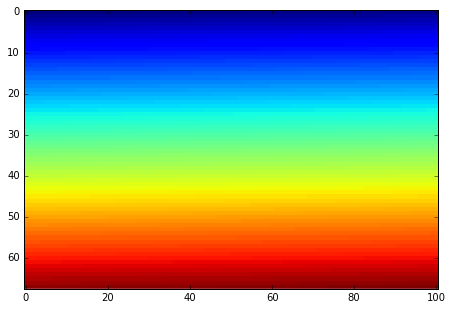

In [33]:
plt.figure(figsize=(15,5))
plt.imshow(rast,interpolation='none')

In [34]:
fl = '/RHESSys/Como/auxdata/gridmet_index_60m.tiff'

In [35]:
# output the new raster
srs = ds.GetProjection()
transform = ds.GetGeoTransform()

output = gdal.GetDriverByName('GTiff').Create(fl,n,m,1,gdal.GDT_Int16)
output.SetGeoTransform(transform) # set coordinates
output.SetProjection(srs) # set projection    
output.GetRasterBand(1).WriteArray(rast)
output = None # close dataset